<a href="https://colab.research.google.com/github/Fikaaw/amazing-feat-eng/blob/main/heart_attack_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Background Problems

- Serangan jantung merupakan salah satu penyakit yang mematikan dan sangat berbahaya.
- Berdasarkan data data heartfoundation serangan jantung menyebabkan 1 dari 25 kasus kematian (sekitar 4%).
- Berbagai cara telah dilakukan untuk menangani kasus serangan jantung mulai dari kasus preventif.
- Salah satu pendekatan yang coba dilakukan adalah dengan bantuan teknologi, spesifik adalah Machine Learning (ML).
- Dengan belajar dari data historis, ML dapat menemukan pola dan membantu untuk memprediksi apakah seseorang rawan terkena serangan jantung atau tidak.
- Hal ini dapat membantu seseorang yang di prediksi rawan terkena jantung untuk memulai hidup sehat dan melakukan tindakan pencegahan.

## Dataset
- data source : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data
***
- age --> umur dari pasien
- sex --> jenis kelamin dari pasien
- cp --> tipe chest pain (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic)
- trtbps --> (Resting blood pressure (in mm Hg))
- chol --> (Cholestoral in mg/dl)
- fbs --> fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
- restecg --> hasil Resting electrocardiographic (0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy)
- thalachh --> (Maximum heart rate)
- oldpeak --> (Previous peak)
- slp --> Slope
- caa --> Number of major vessels
- thall --> Thalium Stress Test result (0,3)
- exng --> Exercise induced angina (1 = Yes, 0 = No)
- output - Target variable (1 = rawan serangan jantung, 0 = aman serangan jantung)

## Approach
- Setelah kamu mengetahui background dari projects, kamu akhirnya mulai mengumpulkan dataset dengan ciri-ciri diatas.
- Dari dataset didapatkan bahwa kasus ini bisa menggunakan pendekatan Machine Learning (ML) dengan tipe Supervised Learning (Classification)

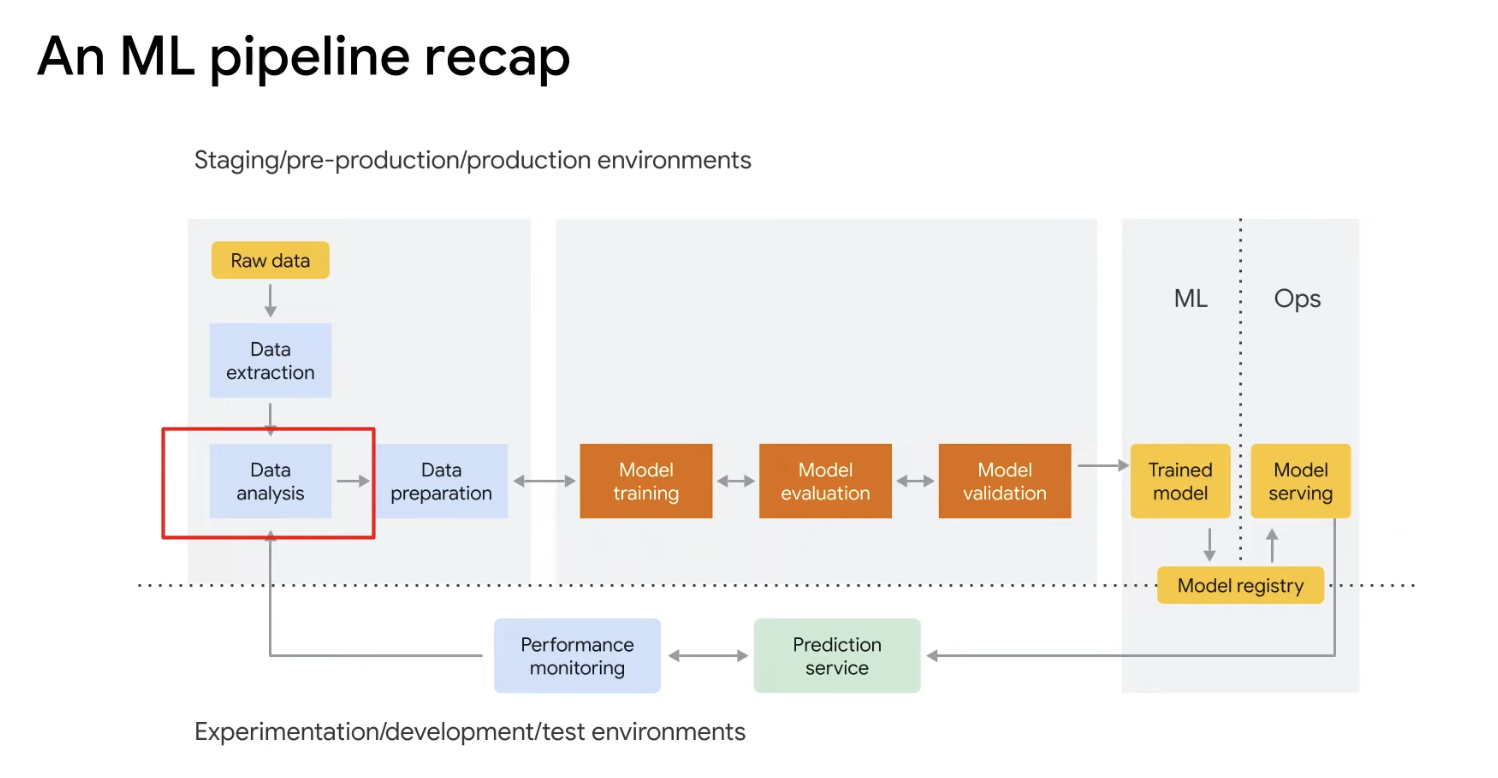

- source : google

## Load Dependencies

In [ ]:
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Load Utils & Functions

In [ ]:
def remove_outliers(df, col):
  """
  function to remove outliers in a column of a dataframe
  using IQR method

  params:
    df: dataframe
    col: column name
  return:
    df_clean: dataframe without outliers
  """

  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df_clean = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

  return df_clean

def modeling(model, X_train, X_test, y_train, y_test):
  """
  function to train and predict model
  params:
    model: model name
    X_train: training features
    X_test: testing features
    y_train: training target
    y_test: testing target
  return:
    model: trained model
    y_pred: predicted target
    y_pred_train: predicted training target
  """
  start = time.time()
  # train model
  model.fit(X_train, y_train)
  end = time.time()
  print(f'training time: {end - start}')
  # predict
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  return model, y_pred, y_pred_train

def evaluation(y_actual, y_pred, segment):
  """
  function to evaluate model
  params:
    y_actual: actual target
    y_pred: predicted
    segment: segment name
  """

  accuracy = accuracy_score(y_actual, y_pred)

  print(f'evaluation for segment {segment}')
  print(f'Accuracy :', accuracy)

## Load Dataset

In [ ]:
# load dataset
data = pd.read_csv(r"/content/drive/MyDrive/Ristek UI/heart.csv")

In [ ]:
# check number of columns and rows
data.shape

(303, 14)

In [ ]:
# look top 4 data
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Sneak Peak Dataset

In [ ]:
# check general information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# descriptive statistics dari data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
# check missing values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
# check data duplicates
data.duplicated().sum()

1

- Summary dataset
  - kolom pada data sudah bertipe numerik, jadi tidak perlu dirubah lagi.
  - tidak ada nilai missing values
  - terdapat nilai duplikat, jadi perlu di handle
  - tidak terdapat nilai yang aneh

### Data Preprocessing

In [ ]:
# handle duplicate data
data_clean = data.drop_duplicates().reset_index(drop=True)

In [ ]:
# 1 data duplikat berhasil di drop
data.shape, data_clean.shape

((303, 14), (302, 14))

## Exploratory Data Analysis (EDA)

In [ ]:
data_clean.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


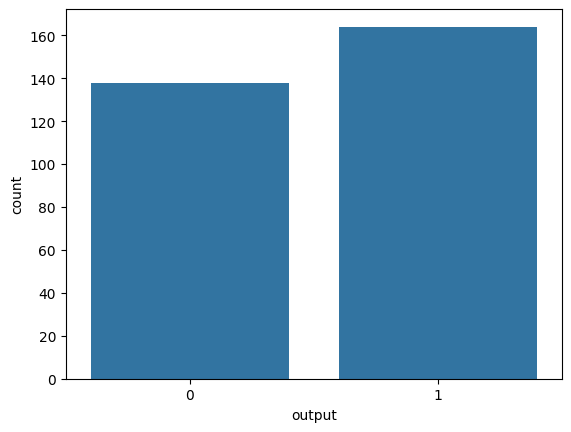

In [ ]:
# check target variable
sns.countplot(data=data_clean, x='output');

- target variable is not imbalance

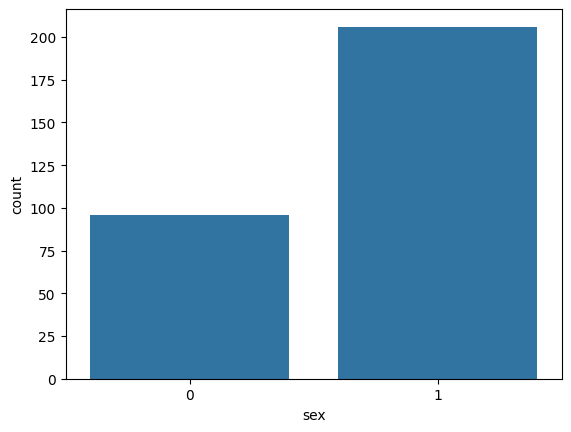

In [ ]:
# explore gender
sns.countplot(data=data_clean, x='sex');

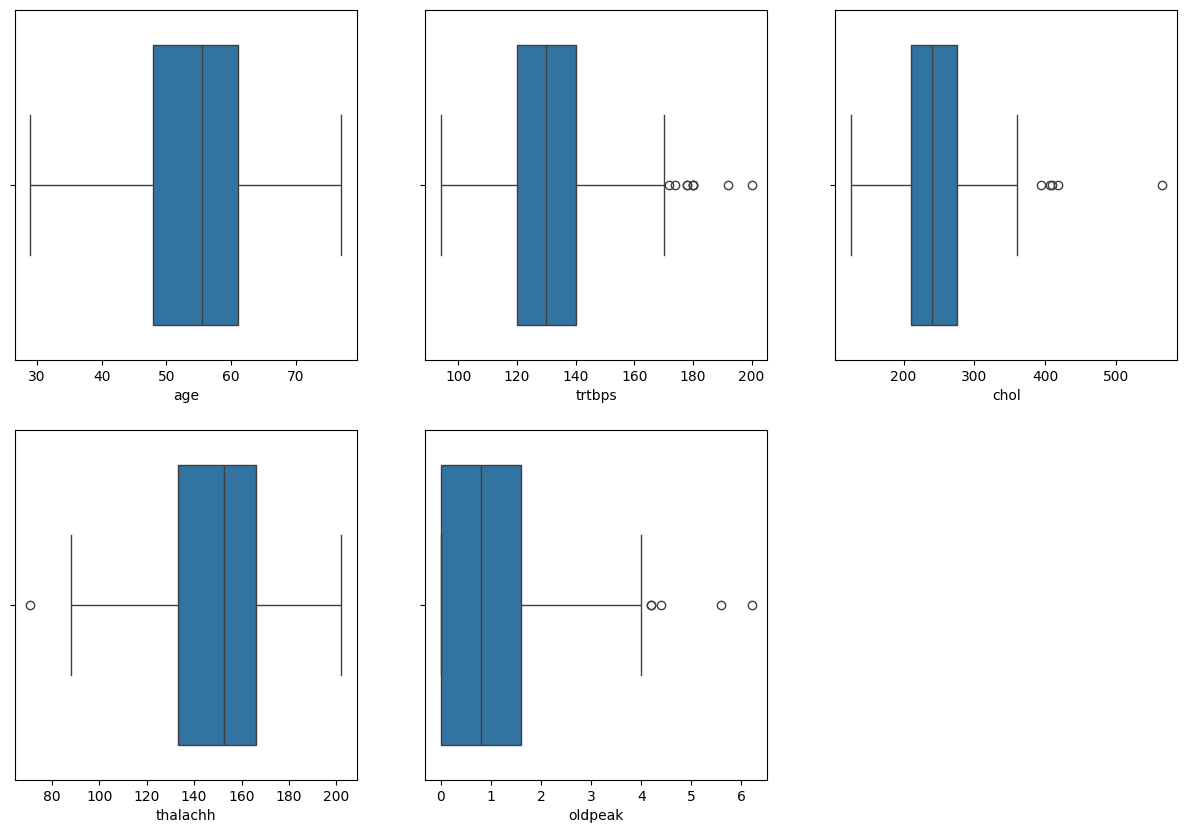

In [ ]:
# create boxplot to check the outliers of numerical features
plt.figure(figsize=(15, 10))
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=data_clean, x=feature)

- features thalach, trtbps, chol, and oldpeak have several outliers

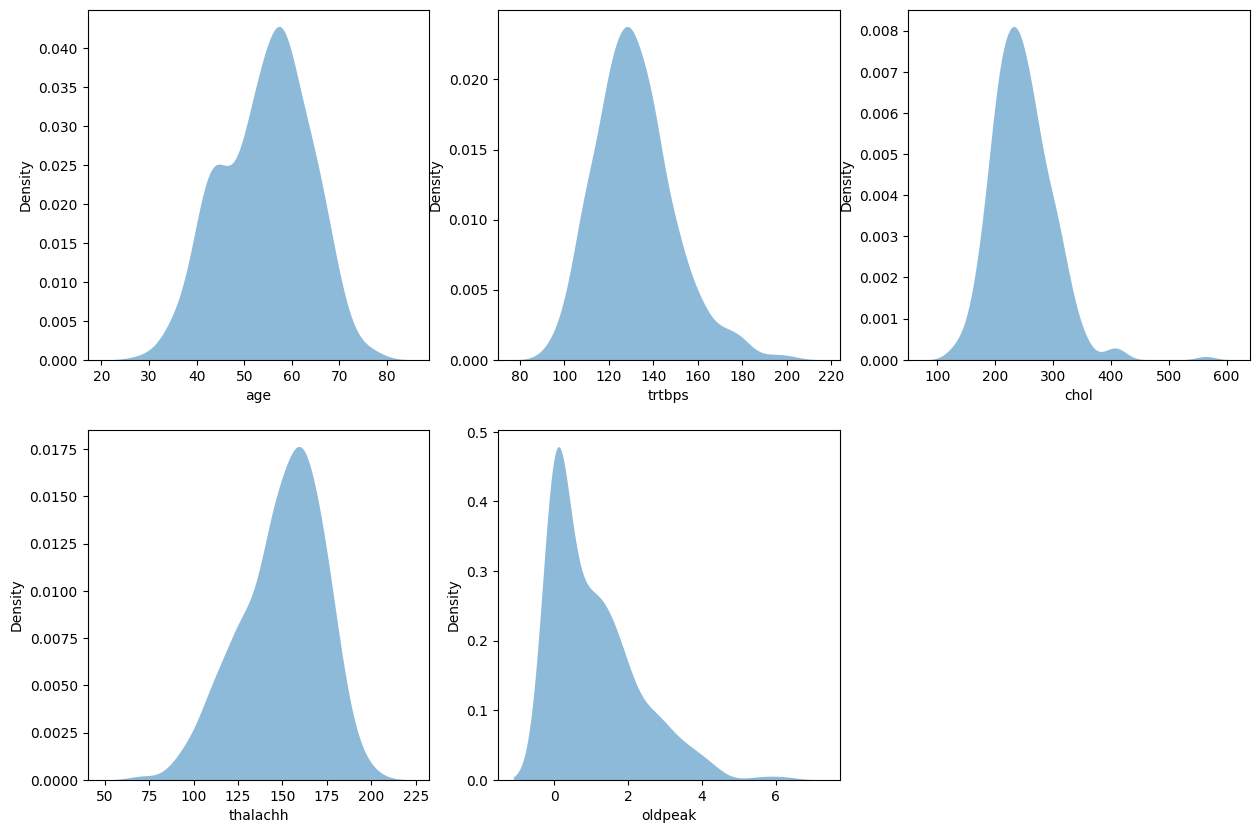

In [ ]:
# check distribution plot
plt.figure(figsize=(15, 10))
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=data_clean, x=feature, fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0);

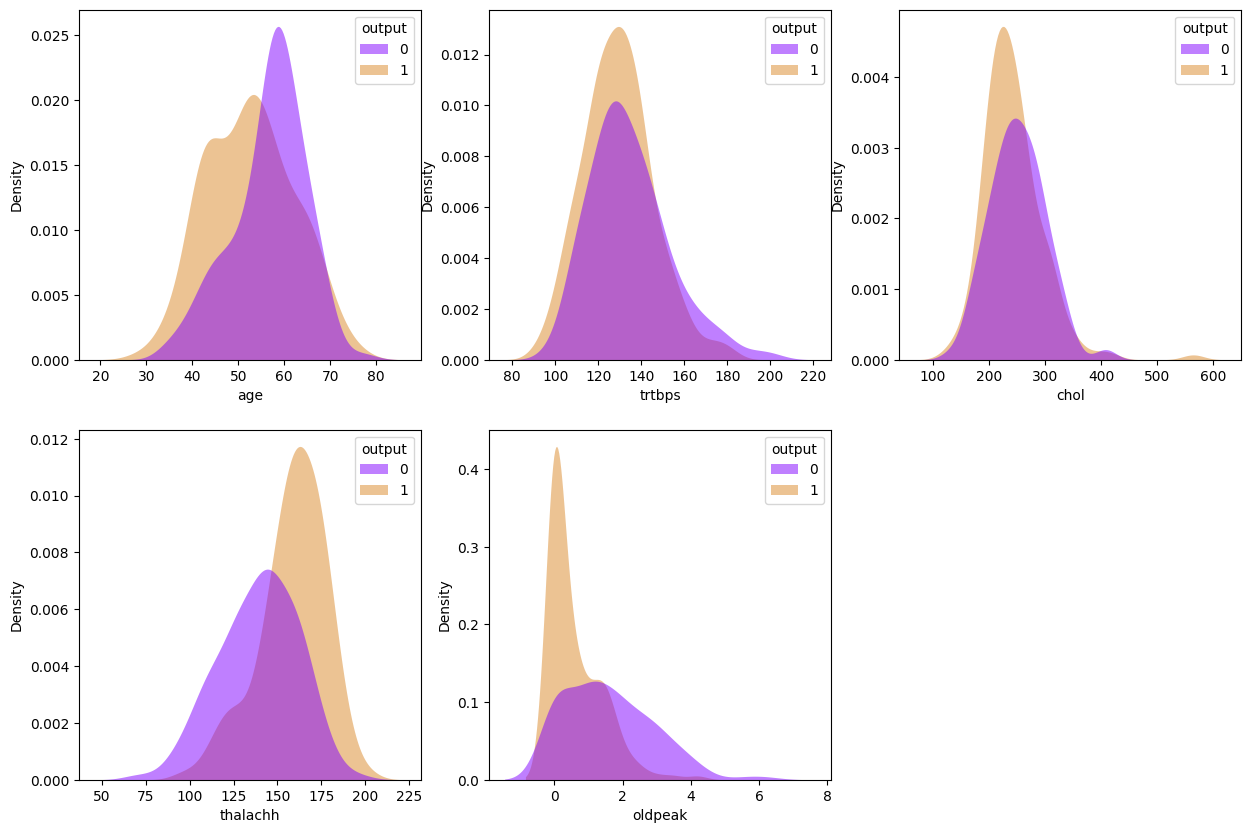

In [ ]:
# create distribution plot between features and target variables
plt.figure(figsize=(15, 10))
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=data_clean, x=feature, hue="output", fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0);

In [ ]:
# correlation score
data_clean.corr()['output'].sort_values()

exng       -0.435601
oldpeak    -0.429146
caa        -0.408992
thall      -0.343101
sex        -0.283609
age        -0.221476
trtbps     -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
slp         0.343940
thalachh    0.419955
cp          0.432080
output      1.000000
Name: output, dtype: float64

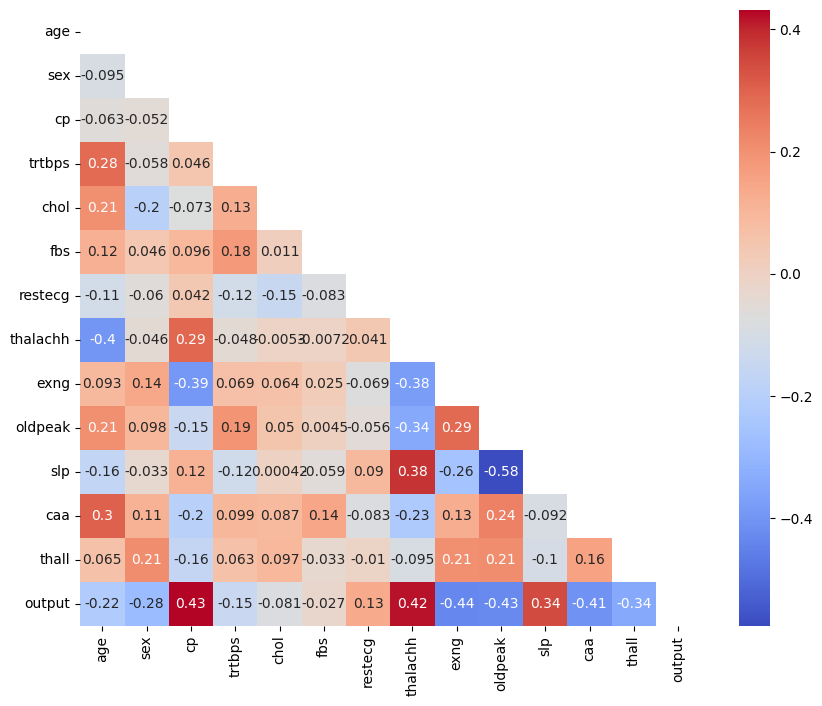

In [ ]:
# correlation score heatmap and add mask
corr = data_clean.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# plot correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm', mask=mask);

- first check correlation score for output variable with independent var
  - the highest score for positive correlation is around (0.4). low to moderate strength
  - the highest score for negative correlation is around (-0.4). low to moderate strength
- some independent var also have moderate strength e.g oldpeak and slp (0.58)

## Modeling Preparation
- Akan coba beberapa situasi untuk eksperimen modeling
  - Modeling #1 akan coba menggunakan features yang hanya berkorelasi at least moderate (0.4 above) dan menghapus outliers,
  - Modeling #2 akan menggunakan semua features as is
  - Modeling #3 scaled features

- Model yang akan digunakan yaitu
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. KNN
5. SVM

- Metode evaluasi yang akan saya gunakan adalah
1. Accuracy

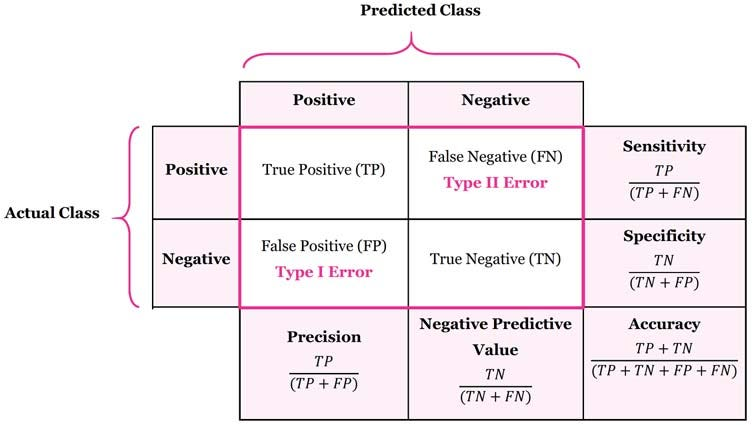

## Modeling #1

In [ ]:
# use only features that have correlation score > 0.4 or < -0.4
features_used = ['exng', 'oldpeak', 'caa', 'thalachh', 'cp', 'output']
data_clean_1 = data_clean[features_used]

In [ ]:
# remove outliers in columns oldpeak and thalachh using IQR methods
for col in ['oldpeak', 'thalachh']:
  data_clean_1 = remove_outliers(data_clean_1, col)

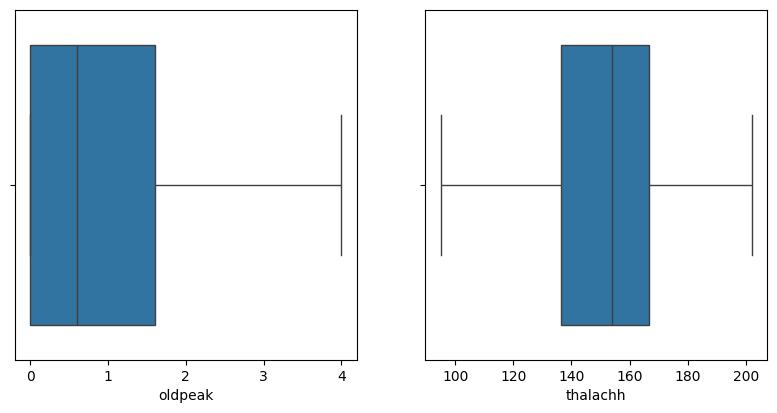

In [ ]:
# lets check
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['oldpeak', 'thalachh']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=data_clean_1, x=feature)

- outliers removed

In [ ]:
# split data into x and y
X = data_clean_1.drop('output', axis=1)
y = data_clean_1['output']

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [ ]:
X_train.head()

,exng,oldpeak,caa,thalachh,cp
69,0,0.0,0,163,0
267,1,3.2,2,116,0
254,1,0.0,3,147,0
39,0,0.8,0,151,2
301,0,0.0,1,174,1


### Logistic Regression

In [ ]:
# modeling and evaluation logistic regression
lr = LogisticRegression(random_state=2024)
model_1, y_pred_1, y_pred_train_1 = modeling(lr, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_1, 'Data Training')
print("--------")
evaluation(y_test, y_pred_1, 'Data Testing')

training time: 0.018978118896484375
--------
evaluation for segment Data Training
Accuracy : 0.8085106382978723
--------
evaluation for segment Data Testing
Accuracy : 0.8983050847457628


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train_1).ravel()

In [ ]:
(tp + tn) / (tp + tn + fp + fn)

0.8085106382978723

- good

### Decision Tree

In [ ]:
# modeling and evaluation decision tree
dt = DecisionTreeClassifier(random_state=42)
model_2, y_pred_2, y_pred_train_2 = modeling(dt, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_2, 'Data Training')
print("--------")
evaluation(y_test, y_pred_2, 'Data Testing')

training time: 0.007742881774902344
--------
evaluation for segment Data Training
Accuracy : 0.9957446808510638
--------
evaluation for segment Data Testing
Accuracy : 0.7796610169491526


In [ ]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
model_2, y_pred_2, y_pred_train_2 = modeling(dt, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_2, 'Data Training')
print("--------")
evaluation(y_test, y_pred_2, 'Data Testing')

training time: 0.0072629451751708984
--------
evaluation for segment Data Training
Accuracy : 0.8297872340425532
--------
evaluation for segment Data Testing
Accuracy : 0.7627118644067796


- overfit

### Random Forest

In [ ]:
# modeling and evaluation random forest
rf = RandomForestClassifier(random_state=42)
model_3, y_pred_3, y_pred_train_3 = modeling(rf, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_3, 'Data Training')
print("--------")
evaluation(y_test, y_pred_3, 'Data Testing')

training time: 0.17116546630859375
--------
evaluation for segment Data Training
Accuracy : 0.9957446808510638
--------
evaluation for segment Data Testing
Accuracy : 0.7966101694915254


In [ ]:
rf = RandomForestClassifier(random_state=42, max_depth=4)
model_3, y_pred_3, y_pred_train_3 = modeling(rf, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_3, 'Data Training')
print("--------")
evaluation(y_test, y_pred_3, 'Data Testing')

training time: 0.1523609161376953
--------
evaluation for segment Data Training
Accuracy : 0.8680851063829788
--------
evaluation for segment Data Testing
Accuracy : 0.8813559322033898


### KNN

In [ ]:
# modeling and evaluation KNN
knn = KNeighborsClassifier()
model_4, y_pred_4, y_pred_train_4 = modeling(knn, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_4, 'Data Training')
print("--------")
evaluation(y_test, y_pred_4, 'Data Testing')

training time: 0.0046656131744384766
--------
evaluation for segment Data Training
Accuracy : 0.8085106382978723
--------
evaluation for segment Data Testing
Accuracy : 0.8135593220338984


- good

### SVM

In [ ]:
# modeling and evaluation SVM
svm = SVC(random_state=42)
model_5, y_pred_5, y_pred_train_5 = modeling(svm, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_5, 'Data Training')
print("--------")
evaluation(y_test, y_pred_5, 'Data Testing')

training time: 0.011361122131347656
--------
evaluation for segment Data Training
Accuracy : 0.6595744680851063
--------
evaluation for segment Data Testing
Accuracy : 0.7457627118644068


- for modeling 1 so far
1. logistic regression --> good model
2. decision tree --> overfit (need to do tuning hyperparameter)
3. rf --> best model (because we tune the model)
4. knn --> good
5. svm --> bad

## Modeling #2
- use all features

In [ ]:
data_clean_2 = data_clean.copy()

In [ ]:
# split data into x and y
X = data_clean_2.drop('output', axis=1)
y = data_clean_2['output']

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,68,1,2,180,274,1,0,150,1,1.6,1,0,3
196,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,64,1,2,140,335,0,1,158,0,0.0,2,0,2


In [ ]:
# modeling and evaluation logistic regression
lr2 = LogisticRegression(random_state=42)
model_1, y_pred_1, y_pred_train = modeling(lr2, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train, 'Data Training')
print("--------")
evaluation(y_test, y_pred_1, 'Data Testing')

training time: 0.022327423095703125
--------
evaluation for segment Data Training
Accuracy : 0.8755186721991701
--------
evaluation for segment Data Testing
Accuracy : 0.8524590163934426


In [ ]:
# modeling and evaluation decision tree
dtree2 = DecisionTreeClassifier(random_state=42)
model_2, y_pred_2, y_pred_train = modeling(dtree2, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train, 'Data Training')
print("--------")
evaluation(y_test, y_pred_2, 'Data Testing')

training time: 0.006568193435668945
--------
evaluation for segment Data Training
Accuracy : 1.0
--------
evaluation for segment Data Testing
Accuracy : 0.7704918032786885


In [ ]:
dtree2 = DecisionTreeClassifier(random_state=42, max_depth=3)
model_2, y_pred_2, y_pred_train = modeling(dtree2, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train, 'Data Training')
print("--------")
evaluation(y_test, y_pred_2, 'Data Testing')

training time: 0.005737781524658203
--------
evaluation for segment Data Training
Accuracy : 0.8381742738589212
--------
evaluation for segment Data Testing
Accuracy : 0.7868852459016393


In [ ]:
# modeling and evaluation random forest
rf2 = RandomForestClassifier(random_state=42)
model_3, y_pred_3, y_pred_train_3 = modeling(rf2, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_3, 'Data Training')
print("--------")
evaluation(y_test, y_pred_3, 'Data Testing')

training time: 0.1663038730621338
--------
evaluation for segment Data Training
Accuracy : 1.0
--------
evaluation for segment Data Testing
Accuracy : 0.8688524590163934


In [ ]:
rf2 = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=200)
model_3, y_pred_3, y_pred_train_3 = modeling(rf2, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_3, 'Data Training')
print("--------")
evaluation(y_test, y_pred_3, 'Data Testing')

training time: 0.2976820468902588
--------
evaluation for segment Data Training
Accuracy : 0.8796680497925311
--------
evaluation for segment Data Testing
Accuracy : 0.8688524590163934


In [ ]:
# modeling and evaluation KNN
knn2 = KNeighborsClassifier()
model_4, y_pred_4, y_pred_train_4 = modeling(knn2, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_4, 'Data Training')
print("--------")
evaluation(y_test, y_pred_4, 'Data Testing')

training time: 0.00706934928894043
--------
evaluation for segment Data Training
Accuracy : 0.7593360995850622
--------
evaluation for segment Data Testing
Accuracy : 0.6557377049180327


In [ ]:
# modeling and evaluation svm
svm2 = SVC(random_state=42)
model_5, y_pred_5, y_pred_train_5 = modeling(svm2, X_train, X_test, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_5, 'Data Training')
print("--------")
evaluation(y_test, y_pred_5, 'Data Testing')

training time: 0.010114431381225586
--------
evaluation for segment Data Training
Accuracy : 0.6514522821576764
--------
evaluation for segment Data Testing
Accuracy : 0.7049180327868853


## Modeling #3
- scaled all features

In [ ]:
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [ ]:
# try using KNN
knn3 = KNeighborsClassifier()
model_4, y_pred_4, y_pred_train_4 = modeling(knn3, X_train_scaled, X_test_scaled, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_4, 'Data Training')
print("--------")
evaluation(y_test, y_pred_4, 'Data Testing')

training time: 0.006185054779052734
--------
evaluation for segment Data Training
Accuracy : 0.8464730290456431
--------
evaluation for segment Data Testing
Accuracy : 0.8524590163934426


In [ ]:
# try SVM
svm3 = SVC(random_state=42)
model_5, y_pred_5, y_pred_train_5 = modeling(svm3, X_train_scaled, X_test_scaled, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train_5, 'Data Training')
print("--------")
evaluation(y_test, y_pred_5, 'Data Testing')

training time: 0.0068280696868896484
--------
evaluation for segment Data Training
Accuracy : 0.8838174273858921
--------
evaluation for segment Data Testing
Accuracy : 0.8524590163934426


In [ ]:
# try logreg
lr3 = LogisticRegression(random_state=42)
model_1, y_pred_1, y_pred_train = modeling(lr3, X_train_scaled, X_test_scaled, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train, 'Data Training')
print("--------")
evaluation(y_test, y_pred_1, 'Data Testing')

training time: 0.01049947738647461
--------
evaluation for segment Data Training
Accuracy : 0.8547717842323651
--------
evaluation for segment Data Testing
Accuracy : 0.8360655737704918


In [ ]:
# try rf
rf3 = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=200)
model_3, y_pred_3, y_pred_train = modeling(rf3, X_train_scaled, X_test_scaled, y_train, y_test)
print("--------")
evaluation(y_train, y_pred_train, 'Data Training')
print("--------")
evaluation(y_test, y_pred_3, 'Data Testing')

training time: 0.34011054039001465
--------
evaluation for segment Data Training
Accuracy : 0.8796680497925311
--------
evaluation for segment Data Testing
Accuracy : 0.8688524590163934
